In [4]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

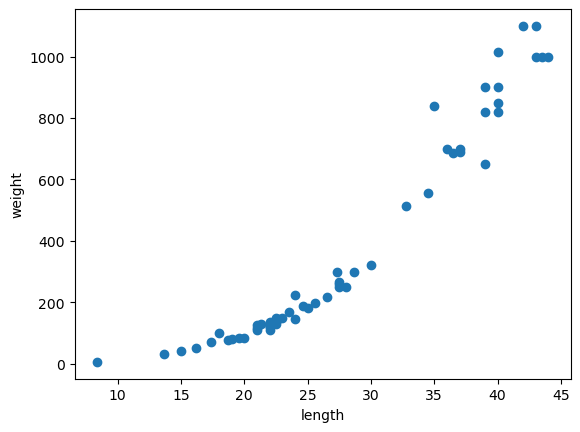

In [6]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) 

In [18]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [21]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# 왜 회귀인데 target 값이 존재하는가? 아, 훈련은 이걸로? 그러면 test는 정답이 없이?
knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
print(knr.score(test_input, test_target))

0.992809406101064


In [26]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
# 정답을 먼저 넣고, 그 다음의 예측값을 순서대로!
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [29]:
print('이것은 train의:',knr.score(train_input, train_target))
print('다른 이것은 test의:',knr.score(test_input, test_target))

이것은 train의: 0.9698823289099254
다른 이것은 test의: 0.992809406101064


In [34]:
knr.n_neighbors = 3
# k-최근접 이웃 회귀에서 k의 개수를 간단하게 바꾸는 방법.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
print('과소적합이 해결되었습니다. 왜냐하면 train_data의 결정계수가 test_data의 결정계수보다 높아졌기 때문입니다.')

0.9804899950518966
0.9746459963987609
과소적합이 해결되었습니다. 왜냐하면 train_data의 결정계수가 test_data의 결정계수보다 높아졌기 때문입니다.


In [37]:
x = np.arange(5, 45).reshape(-1, 1)

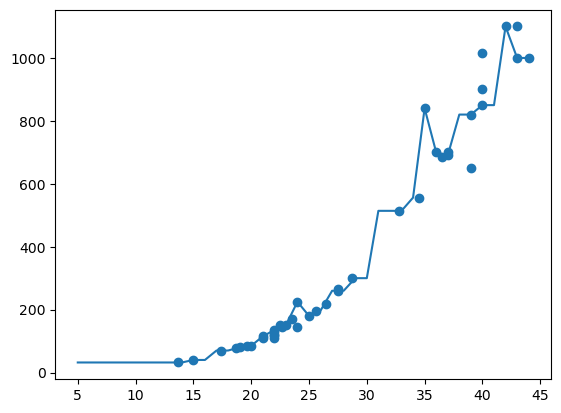

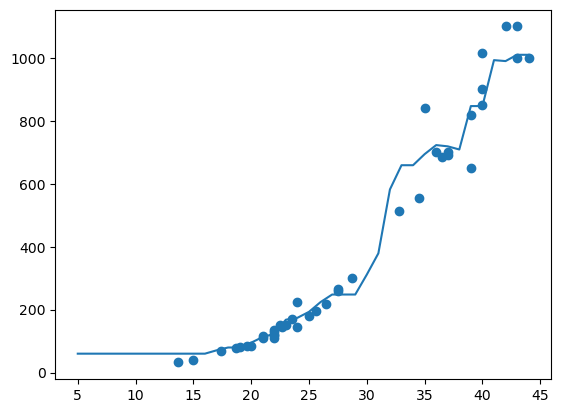

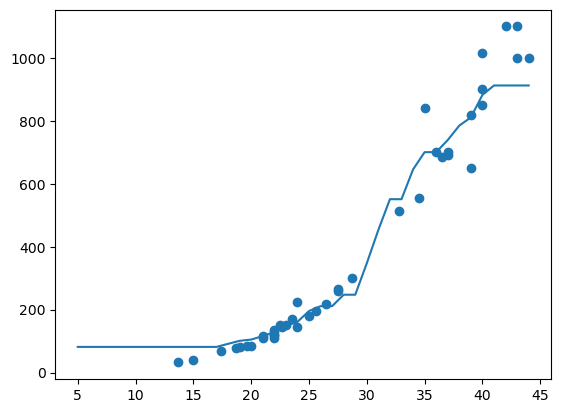

In [42]:
for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
# 여기서 왜 x에 대한 예측을 구하는가?
    
#2. predict() 함수의 '루프(Loop)' 기능
    
# sklearn 라이브러리의 predict() 함수는 내부적으로 다음과 같이 설계되어 있습니다.

# 입력: "데이터가 몇 개든 상관없어. 일단 행렬 형태로 줘."

# 처리: 함수 내부에서 우리가 수동으로 for문을 돌리지 않아도, 입력된 행렬의 각 행(Row)을 순차적으로 읽으며 예측값을 계산합니다.

# 출력: 입력받은 개수(40개)와 똑같은 개수의 예측값을 담은 리스트(배열)를 한 번에 반환합니다.
    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    # 여기서 왜 x와 prediction을 동시에 다루는가?
    plt.plot(x, prediction)
    plt.show()